<a href="https://colab.research.google.com/github/keylperez/SchedulingAlgorithms/blob/main/P_RR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Round-Robin Scheduling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

In [2]:
class Task:
    def __init__(self, processChar, burstTime, arrivalTime):
        self.processChar = processChar
        self.burstTime = burstTime
        self.remainingTime = burstTime  # Remaining burst time
        self.arrivalTime = arrivalTime
        self.completionTime = 0
        self.turnAroundTime = 0
        self.waitingTime = 0
        self.executionLog = []  # Track execution intervals for Gantt chart

    def calculateAttributes(self, time):
        self.completionTime = time
        self.turnAroundTime = self.completionTime - self.arrivalTime
        self.waitingTime = self.turnAroundTime - self.burstTime

    def __repr__(self):
        return (f"{{ Process: {self.processChar}, Burst Time: {self.burstTime}, "
                f"Arrival Time: {self.arrivalTime}, Remaining Time: {self.remainingTime}, "
                f"Waiting Time: {self.waitingTime}, Completion Time: {self.completionTime}, "
                f"Turn Around Time: {self.turnAroundTime} }}")


In [3]:
class Process:
    def __init__(self, processArr):
        self.processArr = processArr
        self.totalTime = 0

    def calculateAverageWaitingTime(self):
        return sum([task.waitingTime for task in self.processArr]) / len(self.processArr)

    def to_dataFrame(self):
        data = {
            "Process": [task.processChar for task in self.processArr],
            "Burst": [task.burstTime for task in self.processArr],
            "Arrival": [task.arrivalTime for task in self.processArr],
            "Waiting": [task.waitingTime for task in self.processArr],
            "Completion": [task.completionTime for task in self.processArr],
            "TurnAround": [task.turnAroundTime for task in self.processArr],
        }
        return pd.DataFrame(data)

In [4]:
# Input Section
while True:
    try:
        quantProcess = int(input("Input how many processes you will input: "))
        break
    except:
        print("PLEASE INPUT INTEGERS!!!")

while True:
    try:
        timeQuantum = int(input("Input the time quantum: "))
        break
    except:
        print("PLEASE INPUT INTEGERS!!!")

taskChar = 'A'
taskArr = []

for x in range(quantProcess):
    print(f"Process {taskChar}")

    while True:
        try:
            bt = int(input("Input Burst Time: "))
            break
        except:
            print("Please input integers!!!")

    while True:
        try:
            at = int(input("Input Arrival Time: "))
            break
        except:
            print("Please input integers!!!")

    taskArr.append(Task(taskChar, bt, at))
    taskChar = chr(ord(taskChar) + 1)

finalProcess = Process(taskArr)

Input how many processes you will input: 4
Input the time quantum: 2
Process A
Input Burst Time: 5
Input Arrival Time: 0
Process B
Input Burst Time: 3
Input Arrival Time: 1
Process C
Input Burst Time: 6
Input Arrival Time: 0
Process D
Input Burst Time: 2
Input Arrival Time: 2


In [5]:
def printTasks(Object):
    for obj in Object.processArr:
        print(obj)

printTasks(finalProcess)

{ Process: A, Burst Time: 5, Arrival Time: 0, Remaining Time: 5, Waiting Time: 0, Completion Time: 0, Turn Around Time: 0 }
{ Process: B, Burst Time: 3, Arrival Time: 1, Remaining Time: 3, Waiting Time: 0, Completion Time: 0, Turn Around Time: 0 }
{ Process: C, Burst Time: 6, Arrival Time: 0, Remaining Time: 6, Waiting Time: 0, Completion Time: 0, Turn Around Time: 0 }
{ Process: D, Burst Time: 2, Arrival Time: 2, Remaining Time: 2, Waiting Time: 0, Completion Time: 0, Turn Around Time: 0 }


In [6]:
def startProcess(Object, timeQuantum):
    currentTime = 0
    task_queue = deque()  # Circular queue
    completed_tasks = 0
    total_tasks = len(Object.processArr)

    # Add tasks to the queue as they arrive
    while completed_tasks < total_tasks:
        # Enqueue new tasks that have arrived
        for task in Object.processArr:
            if task.arrivalTime == currentTime and task not in task_queue and task.remainingTime > 0:
                task_queue.append(task)

        if task_queue:
            # Get the next task from the queue
            current_task = task_queue.popleft()

            # Execute the task for the time quantum or until it finishes
            executionTime = min(timeQuantum, current_task.remainingTime)
            for t in range(executionTime):
                current_task.executionLog.append(currentTime)
                currentTime += 1

                # Enqueue tasks that arrive during the execution
                for task in Object.processArr:
                    if task.arrivalTime == currentTime and task not in task_queue and task.remainingTime > 0:
                        task_queue.append(task)

            # Update the remaining time for the current task
            current_task.remainingTime -= executionTime

            if current_task.remainingTime == 0:
                # If the task is completed, calculate its attributes
                current_task.calculateAttributes(currentTime)
                completed_tasks += 1
            else:
                # Re-enqueue the task if it's not finished
                task_queue.append(current_task)
        else:
            # If no tasks are ready, increment time
            currentTime += 1

    Object.totalTime = currentTime


startProcess(finalProcess, timeQuantum)

In [7]:
df = finalProcess.to_dataFrame()
print(df)

  Process  Burst  Arrival  Waiting  Completion  TurnAround
0       A      5        0        9          14          14
1       B      3        1        9          13          12
2       C      6        0       10          16          16
3       D      2        2        4           8           6


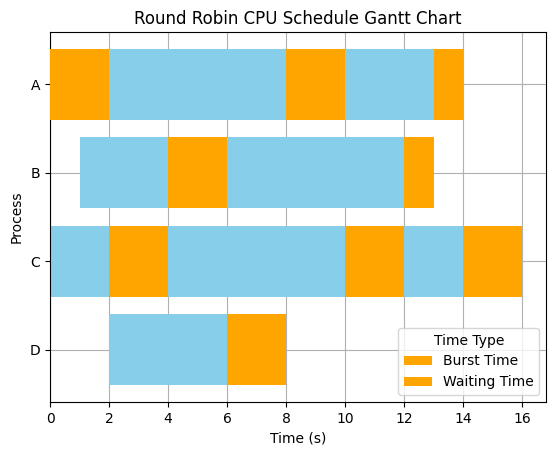

In [8]:
# Plot Gantt Chart with Waiting Time
fig, gnt = plt.subplots()

# Create Gantt chart intervals for each process
for task in finalProcess.processArr:
    # Execution intervals
    execution_intervals = task.executionLog
    for i in range(len(execution_intervals)):
        plt.barh(task.processChar, 1, left=execution_intervals[i], color="orange", zorder=3)

    # Waiting intervals
    for t in range(task.arrivalTime, task.completionTime):
        if t not in execution_intervals:
            plt.barh(task.processChar, 1, left=t, color="skyblue", zorder=2)

plt.title("Round Robin CPU Schedule Gantt Chart")
plt.gca().invert_yaxis()
gnt.grid(True, zorder=1)
gnt.set_ylabel("Process")
gnt.set_xlabel("Time (s)")
plt.legend(["Burst Time", "Waiting Time"], title="Time Type")
plt.show()

In [9]:
print("Average Waiting Time:", finalProcess.calculateAverageWaitingTime(), "s")
print("Total Time:", int(finalProcess.totalTime), "s")

Average Waiting Time: 8.0 s
Total Time: 16 s
